In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
!fortune

"We will be better and braver if we engage and inquire than if we indulge in
the idle fancy that we already know -- or that it is of no use seeking to
know what we do not know."
-- Plato


<IPython.core.display.Javascript object>


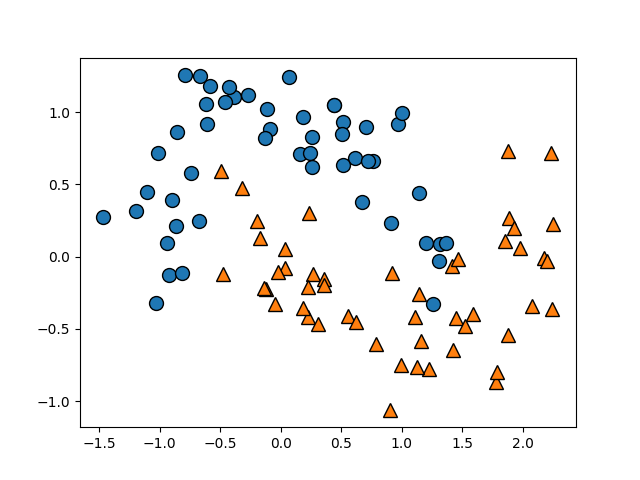

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib notebook

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=555)

plt.close()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

<IPython.core.display.Javascript object>


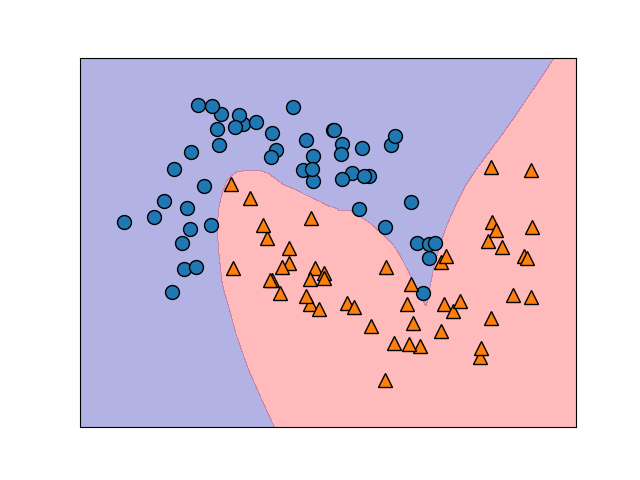

In [12]:
from sklearn.neural_network import MLPClassifier
plt.close()

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X, y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

<IPython.core.display.Javascript object>


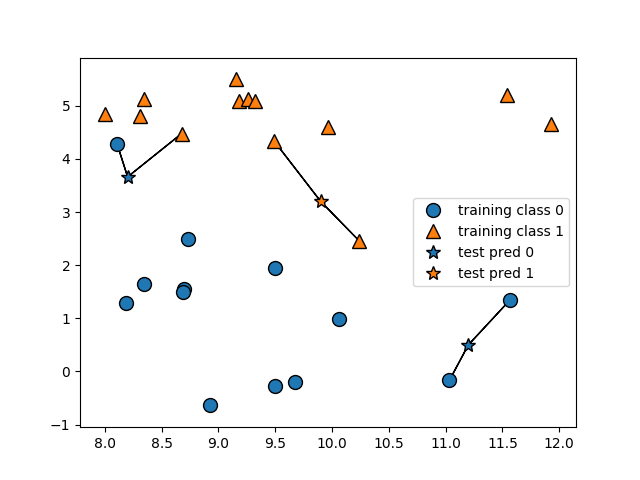

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [25]:
linear_data = np.array([
    [0, 1],
    [2, 1.7],
    [8, 3],
    [9, 3.1],
    [10, 3.8],
    [11, 4.5],
])

In [26]:
linear_data

array([[  0. ,   1. ],
       [  2. ,   1.7],
       [  8. ,   3. ],
       [  9. ,   3.1],
       [ 10. ,   3.8],
       [ 11. ,   4.5]])

In [28]:
X = linear_data[:, 0:1]
y = linear_data[:, 1]

In [29]:
X

array([[  0.],
       [  2.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.]])

In [30]:
y

array([ 1. ,  1.7,  3. ,  3.1,  3.8,  4.5])

<IPython.core.display.Javascript object>


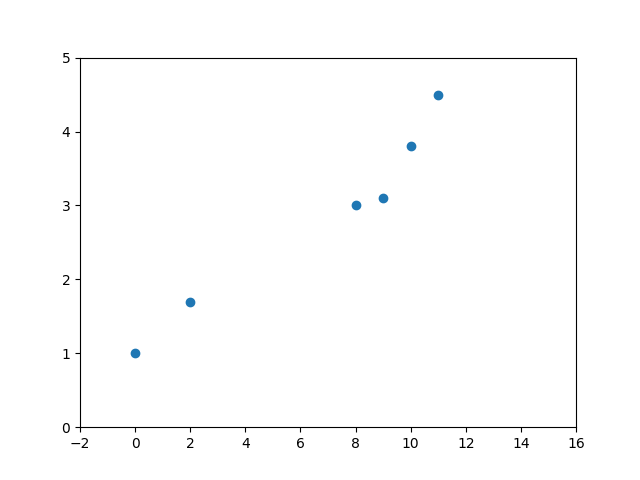

(0, 5)

In [31]:
plt.close()

plt.scatter(X[:, 0], y)
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

Нека се отървем от малко излишни warning-и

In [33]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="sklearn", message="^Objective did not")

Сега малко линейна регресия с тези данни:х

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
model.coef_, model.intercept_

(array([ 0.27870968]), 0.99193548387096819)

Я сега да видим какво сме изтренирали с красиви картинки. В идеалният случай линейната ни функция ще минава минава много близо до всичките ни точки

<IPython.core.display.Javascript object>


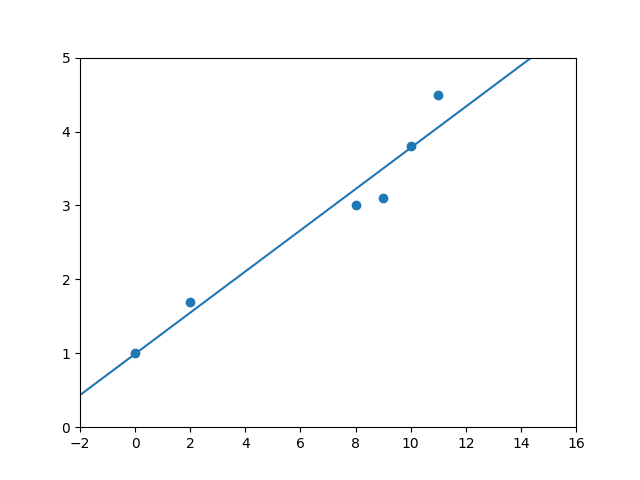

(0, 5)

In [55]:
interval = np.linspace(-2, 16)
result = interval * model.coef_[0] + model.intercept_

plt.close()
plt.scatter(X[:, 0], y)
plt.plot(interval, result)
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

И сега малко предвиждания за точки, които не сме виждали:

In [58]:
model.predict(np.array([[0], [4], [5], [14]]))

array([ 0.99193548,  2.10677419,  2.38548387,  4.89387097])

И все пак колко е хубав нашия модел?

In [59]:
model.score(X, y)

0.94935998931725851

# Нека опитаме с нелинейна функция

In [61]:
interval = np.linspace(-2, 16)
result = interval * model.coef_[0] + model.intercept_

result

array([ 0.43451613,  0.53689928,  0.63928242,  0.74166557,  0.84404872,
        0.94643186,  1.04881501,  1.15119816,  1.2535813 ,  1.35596445,
        1.4583476 ,  1.56073074,  1.66311389,  1.76549704,  1.86788018,
        1.97026333,  2.07264648,  2.17502962,  2.27741277,  2.37979592,
        2.48217907,  2.58456221,  2.68694536,  2.78932851,  2.89171165,
        2.9940948 ,  3.09647795,  3.19886109,  3.30124424,  3.40362739,
        3.50601053,  3.60839368,  3.71077683,  3.81315997,  3.91554312,
        4.01792627,  4.12030941,  4.22269256,  4.32507571,  4.42745885,
        4.529842  ,  4.63222515,  4.73460829,  4.83699144,  4.93937459,
        5.04175774,  5.14414088,  5.24652403,  5.34890718,  5.45129032])